In [1]:
# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set

In [3]:
dataset_train = pd.read_csv('natural_gas_price_training_set.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [4]:
# Feature scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
# Creating a data structure with 60 timesteps and 1 output

In [7]:
x_train = []
y_train = []
for i in range(60, 1866):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [8]:
# Reshaping

In [9]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [10]:
# Importing the keras libraries and packages

In [11]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [12]:
# Initialising the RNN

In [13]:
regressor = Sequential()

In [14]:
# Adding the first LSTM layer and some Dropout regularisation 

In [15]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [16]:
# Adding the second LSTM layer and some Dropout regularisation 

In [17]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [18]:
# Adding the third LSTM layer and some Dropout regularisation 

In [19]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [20]:
# Adding the fourth LSTM layer and some Dropout regularisation 

In [21]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [22]:
# Adding the output layer

In [23]:
regressor.add(Dense(units = 1))

In [24]:
# Compiling the RNN

In [25]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [26]:
# Fitting the RNN to the training set

In [27]:
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
57/57 [==============================] - 32s 230ms/step - loss: 0.0090
Epoch 2/100
57/57 [==============================] - 12s 207ms/step - loss: 0.0035
Epoch 3/100
57/57 [==============================] - 12s 208ms/step - loss: 0.0032
Epoch 4/100
57/57 [==============================] - 13s 220ms/step - loss: 0.0028
Epoch 5/100
57/57 [==============================] - 12s 206ms/step - loss: 0.0027
Epoch 6/100
57/57 [==============================] - 13s 220ms/step - loss: 0.0027
Epoch 7/100
57/57 [==============================] - 17s 290ms/step - loss: 0.0026
Epoch 8/100
57/57 [==============================] - 13s 219ms/step - loss: 0.0024
Epoch 9/100
57/57 [==============================] - 11s 201ms/step - loss: 0.0023
Epoch 10/100
57/57 [==============================] - 11s 190ms/step - loss: 0.0022
Epoch 11/100
57/57 [==============================] - 11s 199ms/step - loss: 0.0024
Epoch 12/100
57/57 [==============================] - 11s 199ms/step - loss: 0.0019
E

57/57 [==============================] - 11s 191ms/step - loss: 7.7226e-04
Epoch 97/100
57/57 [==============================] - 11s 198ms/step - loss: 7.7902e-04
Epoch 98/100
57/57 [==============================] - 11s 192ms/step - loss: 6.9080e-04
Epoch 99/100
57/57 [==============================] - 11s 192ms/step - loss: 6.7092e-04
Epoch 100/100
57/57 [==============================] - 11s 200ms/step - loss: 6.8365e-04


In [28]:
# Getting the real Natural Gas Price of 2022

In [29]:
dataset_test = pd.read_csv('natural_gas_price_test_set.csv')
real_natural_gas_price = dataset_test.iloc[:, 1:2].values

In [30]:
# Getting the predicted Natural Gas Price of 2022

In [31]:
dataset_total = pd.concat((dataset_train['Price'], dataset_test['Price']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 193):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_natural_gas_price = regressor.predict(x_test)
predicted_natural_gas_price = sc.inverse_transform(predicted_natural_gas_price)

5/5 [==============================] - 3s 54ms/step


In [32]:
# Visualising the results

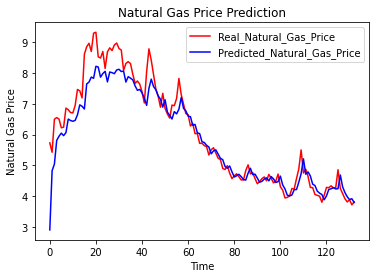

In [33]:
plt.plot(real_natural_gas_price, color = 'red', label = 'Real_Natural_Gas_Price')
plt.plot(predicted_natural_gas_price, color = 'blue', label = 'Predicted_Natural_Gas_Price')
plt.title('Natural Gas Price Prediction')
plt.xlabel('Time')
plt.ylabel('Natural Gas Price')
plt.legend()
plt.show()

In [37]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_natural_gas_price, predicted_natural_gas_price))
print(rmse)

0.5443833244011154
